In [1]:
# -*- coding: utf-8 -*-

# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

# Configuraciones
%matplotlib inline 
%pylab inline 

# Lectura de archivo
myData = pd.read_csv('/home/fransafu/UTEM/Mineria de datos/Proyecto Semestral/data_mineria_de_datos_2.csv', sep=';', encoding='utf-8', nrows=20000000, engine='c')

# Mostrar Tabla de datos para archivo
myData.head()

Populating the interactive namespace from numpy and matplotlib


,DIRECTOR_GENERO,DIRECTOR_ID,TIEMPO,VOTO_PROMEDIO,POPULARIDAD_DETALLE,VOTO_CONTADOR,GENERO,ANIO,ID_PELICULA,POPULARIDAD,RATING_PROMEDIO,RATING
0,2,2,8,7,"1,115168",1,11,2003,1,"1,115168","3,749543",3
1,2,2,8,7,"1,115168",1,11,2003,1,"1,115168","3,749543",5
2,2,2,8,7,"1,115168",1,11,2003,1,"1,115168","3,749543",4
3,2,2,8,7,"1,115168",1,11,2003,1,"1,115168","3,749543",4
4,2,2,8,7,"1,115168",1,11,2003,1,"1,115168","3,749543",3


In [2]:
def data_to_float(data):
    return float(data.replace(",","."))

myData['POPULARIDAD_DETALLE'] = myData['POPULARIDAD_DETALLE'].apply(data_to_float)
myData['POPULARIDAD'] = myData['POPULARIDAD'].apply(data_to_float)

myData['RATING_PROMEDIO'] = myData['RATING_PROMEDIO'].apply(data_to_float)

In [3]:
# Ver numero de filas y columnas
# (filas, columnas)
myData.shape

(1048499, 12)

In [4]:
# Describir datos
myData.describe()

,DIRECTOR_GENERO,DIRECTOR_ID,TIEMPO,VOTO_PROMEDIO,POPULARIDAD_DETALLE,VOTO_CONTADOR,GENERO,ANIO,ID_PELICULA,POPULARIDAD,RATING_PROMEDIO,RATING
count,1.048499e+06,1.048499e+06,1.048499e+06,1.048499e+06,1.048499e+06,1.048499e+06,1.048499e+06,1.048499e+06,1.048499e+06,1.048499e+06,1.048499e+06,1.048499e+06
mean,1.831323e+00,2.428457e+00,4.855617e+00,6.589754e+00,1.398413e+01,9.807460e+02,5.863397e+00,1.994865e+03,8.986214e+01,1.398413e+01,3.631828e+00,3.631826e+00
std,4.140849e-01,1.681779e+00,1.666140e+00,1.029526e+00,6.598721e+00,1.290811e+03,3.247960e+00,1.092094e+01,5.859875e+01,6.598721e+00,3.473008e-01,1.047041e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.002391e+00,0.000000e+00,1.000000e+00,1.927000e+03,1.000000e+00,1.002391e+00,1.954545e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,4.000000e+00,6.000000e+00,9.397158e+00,1.100000e+02,4.000000e+00,1.992000e+03,3.000000e+01,9.397158e+00,3.495171e+00,3.000000e+00
50%,2.000000e+00,2.000000e+00,5.000000e+00,6.000000e+00,1.281898e+01,4.340000e+02,4.000000e+00,1.997000e+03,7.900000e+01,1.281898e+01,3.761842e+00,4.000000e+00
75%,2.000000e+00,3.000000e+00,6.000000e+00,7.000000e+00,1.716392e+01,1.423000e+03,7.000000e+00,2.003000e+03,1.480000e+02,1.716392e+01,3.823254e+00,4.000000e+00
max,2.000000e+00,6.000000e+00,8.000000e+00,8.000000e+00,2.478159e+01,3.974000e+03,1.600000e+01,2.005000e+03,1.750000e+02,2.478159e+01,4.003847e+00,5.000000e+00


In [5]:
# RANDOM FOREST
# Librerias
from pandas import Series, DataFrame
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# Obtener copia de datos pero omitiendo los campos NA
data_clean = myData.dropna()

# Campos a analizar y datos target
predictors = data_clean[[
"VOTO_PROMEDIO",
"POPULARIDAD_DETALLE",
"VOTO_CONTADOR",
"ANIO",
"ID_PELICULA",
"POPULARIDAD",
"RATING_PROMEDIO"
]]
targets = data_clean.RATING

# Preparamos division de datos entre entrenamiento y prueba
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size = 0.2)

In [7]:
"""
Instanciamos random forest con 25 arboles de estimacion, para luego 
contruir el modelo con los datos de entrenamiento y despues predecir los
datos de prueba. Finalmente obtenemos la matri< de confusión
"""
# Instanciamos random forest co
classifier = RandomForestClassifier(n_estimators=25)
classifier = classifier.fit(pred_train, tar_train)
predictions = classifier.predict(pred_test)
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[  186,   126,  4214,  2804,   904],
       [  151,   149,  9173,  8311,  1707],
       [   94,   106, 18808, 35012,  5099],
       [   31,    24, 13557, 51972, 10774],
       [   18,    12,  5336, 29685, 11447]])

In [8]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.39371483071053887

In [9]:
# instanciamos el modelo
model = ExtraTreesClassifier()
# Vemos la lista de ajustes del modelo
model.fit(pred_train, tar_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

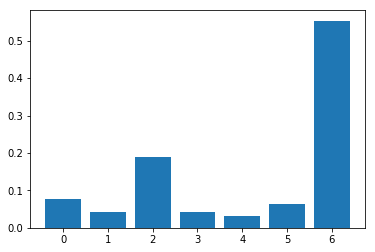

In [10]:
# Grafica de importancia de cada variable
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()